# Zählen aller Aminosäuren in einer fasta-Datei durch erstellen einer library

In [114]:
%matplotlib inline
from urllib import request
from Bio import SeqIO
import matplotlib.pyplot as plt
from scipy import stats

In [99]:
! wget ftp://ftp.ncbi.nih.gov/genomes/Bacteria/Salmonella_enterica_serovar_Typhimurium_SL1344_uid86645/NC_016810.faa

--2015-09-14 10:49:59--  ftp://ftp.ncbi.nih.gov/genomes/Bacteria/Salmonella_enterica_serovar_Typhimurium_SL1344_uid86645/NC_016810.faa
           => ‘NC_016810.faa.3’
Resolving ftp.ncbi.nih.gov (ftp.ncbi.nih.gov)... 130.14.250.13, 2607:f220:41e:250::13
Connecting to ftp.ncbi.nih.gov (ftp.ncbi.nih.gov)|130.14.250.13|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/Bacteria/Salmonella_enterica_serovar_Typhimurium_SL1344_uid86645 ... done.
==> SIZE NC_016810.faa ... 2033116
==> PASV ... done.    ==> RETR NC_016810.faa ... done.
Length: 2033116 (1,9M) (unauthoritative)

NC_016810.faa.3      76%[===============>      ]   1,47M   935KB/s             

In [100]:
for seq_record in SeqIO.parse("NC_016810.faa", "fasta"): # was ist SeqIO??
    print(SeqIO)
    break

<module 'Bio.SeqIO' from '/usr/lib/python3/dist-packages/Bio/SeqIO/__init__.py'>


In [101]:
for seq_record in SeqIO.parse("NC_016810.faa", "fasta"):# x.parse teilt die fasta in Objekte auf. Objekte wurden "seq_record" benannt
        print(seq_record)
        break

ID: gi|378697984|ref|YP_005179941.1|
Name: gi|378697984|ref|YP_005179941.1|
Description: gi|378697984|ref|YP_005179941.1| thr operon leader peptide [Salmonella enterica subsp. enterica serovar Typhimurium str. SL1344]
Number of features: 0
Seq('MTEYTTSMNRISTTTITTITITTGNGAG', SingleLetterAlphabet())


In [102]:
for seq_record in SeqIO.parse("NC_016810.faa", "fasta"):
        print(str(seq_record.seq))#x.seq schneidet die Aminosäurensequenz eines einzelnen Objekts aus
        break    #mit print die Sequenzanzeigen lassen. Nicht vergessen: Sequenz mit str() in String verwandeln

MTEYTTSMNRISTTTITTITITTGNGAG


In [103]:
for seq_record in SeqIO.parse("NC_016810.faa", "fasta"):
    for amino_acid in str(seq_record.seq):# "str(seq_record.seq)" gibt die ASS als String für jeden einzelnen seq_record("seq_record's" enthielten davor noch andere Informationen neben der ASS) aus
        print(amino_acid)# "for amino_acid in" für jede einzelne Aminosäure (Element im String) werden die nachfolgenden Aktionen durchgeführt.
        break
    break

M


In [104]:
amino_acid_countings = {} # Erstellt ein dictionary, das allerdings leer ist. dictionarys bestehen aus Schlüssel-Objektpaaren. Beispiel: food = {"ham" : "yes", "egg" : "yes", "spam" : "no" } 

for seq_record in SeqIO.parse("NC_016810.faa", "fasta"):
    for amino_acid in str(seq_record.seq):
        amino_acid_countings.setdefault(amino_acid, 0)#"dict.setdefault(key, default=None)" amino_acid ist also der Key. Nach dem Komma wird ein Wert hinzugefügt
        print(amino_acid_countings)
        break
    break

{'M': 0}


In [105]:
amino_acid_countings = {}

for seq_record in SeqIO.parse("NC_016810.faa", "fasta"):
    for amino_acid in str(seq_record.seq):
        amino_acid_countings.setdefault(amino_acid, 0)#Falls bereits ein Eintrag im dictionary besteht, setzt ".setdefault() den Wert nicht auf 0 und den nächste Befehl ist an der Reihe 
        amino_acid_countings[amino_acid] += 1# fügt dem dictionary den Wert 1 hinzu
        print(amino_acid_countings)
        break
    break

{'M': 1}


In [115]:
amino_acid_countings = {}
amino_acid_frequencies = []
for seq_record in SeqIO.parse("NC_016810.faa", "fasta"):
    for amino_acid in str(seq_record.seq):
        amino_acid_countings.setdefault(amino_acid, 0)
        amino_acid_countings[amino_acid] += 1
    
for amino_acid, counting in amino_acid_countings.items():
    #print(amino_acid, counting)
    amino_acid_frequencies.append(counting)
    print(counting)

103602
32246
78889
98495
61273
76925
38998
78645
16188
149603
21384
83453
81089
40218
73294
60303
62717
54201
137164
53480


[0, 1, 2, 3, 4]


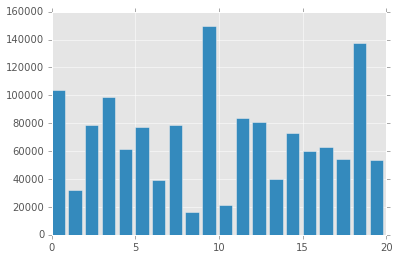

In [116]:
plt.bar(range(len(amino_acid_countings)), amino_acid_countings.values())# mit range wird die Länge der x-achse angegeben: bei range(5) ist die x-achse 5 elemente lang und beginnt per default bei 0
print(list(range(5)))


In [117]:
amino_acid_countings = {}

for seq_record in SeqIO.parse("NC_016810.faa", "fasta"):
    print(seq_record.id, len(str(seq_record.seq)))
    for amino_acid in str(seq_record.seq):
        amino_acid_countings.setdefault(amino_acid, 0)
        amino_acid_countings[amino_acid] += 1
    if len(str(seq_record.seq)) > 500:
        break
print(amino_acid_countings.items())



gi|378697984|ref|YP_005179941.1| 28
gi|378697985|ref|YP_005179942.1| 820
dict_items([('G', 68), ('H', 15), ('R', 47), ('V', 67), ('Q', 33), ('T', 44), ('M', 25), ('E', 45), ('C', 12), ('L', 90), ('W', 4), ('I', 52), ('S', 55), ('Y', 19), ('D', 46), ('K', 32), ('P', 30), ('F', 30), ('A', 94), ('N', 40)])


In [119]:
plt.bar?

In [120]:
protein_length_list = []

for seq_record in SeqIO.parse("NC_016810.faa", "fasta"):
    len(str(seq_record.seq))
    protein_length_list.append(len(str(seq_record.seq)))
#print(protein_lenght_list)

In [111]:
plt.style.use("ggplot")

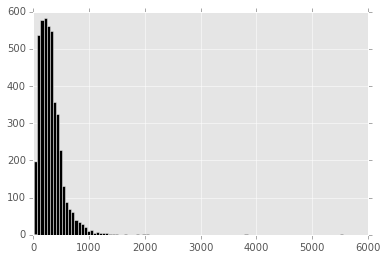

In [127]:
histo = plt.hist(protein_length_list, bins = 100, color = "black")

In [113]:
amino_acid_countings = {}

for seq_record in SeqIO.parse("NC_016810.faa", "fasta"):
    for amino_acid in str(seq_record.seq):
        amino_acid_countings.setdefault(amino_acid, 0)
        amino_acid_countings[amino_acid] += 1
    
for amino_acid, counting in amino_acid_countings.items():# x.items gibt den Key und den Value einer library aus.
    print(amino_acid, counting)# "for amino_acid ,counting" benennt dann Key und Value

G 103602
H 32246
R 78889
V 98495
Q 61273
T 76925
M 38998
E 78645
C 16188
L 149603
W 21384
I 83453
S 81089
Y 40218
D 73294
K 60303
P 62717
F 54201
A 137164
N 53480
